<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_8_Problema_de_la_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema de la mochila

**Entrada:** Conjunto de objetos, cada uno con un valor y peso específico de las formas $V = [v_1, v_2, ..., v_n]$ y $P = [p_1, p_2, ..., p_n]$ respectivamente. También se recibe un peso máximo específico de la mochila $W$ y la cantidad de objetos presentes en el conjunto.

**Salida:** Valor máximo que se puede almacenar en la mochila ingresada, de forma que este valor corresponda a la solución óptima del problema. 

El problema que se busca resolver en esta ocasión, corresponde al problema de la mochila. El objetivo de este problema es el de calcular la máxima ganancia que se puede obtener al ingresar una cantidad limitada de objetos en una mochila con un almacenamiento limitado, por lo que es un problema de optimización. Para resolver este problema, se utilizará el algoritmo *KnapSack*, el cuál se encargará de encontrar la solución óptima de este problema.

# 2. KnapSack

## 2.1 Código

Los códigos que se muestran a continuación pertenecen a las dos implementaciones del algoritmo *KnapSack*.

In [21]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

### 2.1.1 KnapSack dinámico

In [22]:
subProblemas = 0

def knapSack(v, p, pM, n, verbose = False):
  #Se crea e inicializa una matriz de tamaño "cantidad de objetos + 1" por "peso de la mochila + 1"
  K = [[0 for x in range(pM + 1)] for x in range(n + 1)]

  if verbose == True: 
    print(f"Se crea una matriz de tamaño {n+1} x {pM+1} y se inicializa con 0s.")
    print("-------------------------------------------------------------------------")
  
  #Se recorren las filas de la matriz
  for i in range(n + 1):
    #Se recorren las columnas de la matriz
    for w in range(pM + 1):
      global subProblemas
      subProblemas += 1
      #Se va utilizando la sub-estructura óptima para realizar cada cálculo mientras se recorre la matriz
      if (i == 0 or w == 0): K[i][w] = 0

      elif (p[i-1] <= w): 
        K[i][w] = max(v[i-1] + K[i-1][w-p[i-1]], K[i-1][w])

        if verbose == True: 
          if (K[i][w] > K[i][w-1]): 
            print(f"Si {p[i-1]} (pesos en la posición {i-1}) ≤ {w} (columna actual de la matriz), entonces:")
            print(f"La mayor ganancia guardada será el mayor valor entre {v[i-1] + K[i-1][w-p[i-1]]} (valores en la posición {i-1} + matriz en la posición [{i-1}][{w-p[i-1]}]) y {K[i-1][w]} (matriz en la posición [{i-1}][{w}])")
            print(f"Mayor ganancia guardada: {K[i][w]}")

      else: 
        K[i][w] = K[i-1][w]
        if verbose == True: 
          if (K[i][w] > K[i][w-1]): 
            print(f"Si {p[i-1]} (pesos en la posición {i-1}) > {w} (columna actual de la matriz), entonces:")
            print(f"Mayor ganancia guardada: {K[i][w]}")
    
    if verbose == True: print("-------------------------------------------------------------------------")
  
  #Se retorna el último valor de la matriz (el valor de la ezquina inferior derecha), el cuál representa la solución óptima del problema
  return K[n][pM]

#Ejemplo
valor = [60, 100, 120]
peso = [10, 20, 30]
pesoMaxMochila = 50
cantObjetos = len(valor)
valorMaximo = knapSack(valor, peso, pesoMaxMochila, cantObjetos)
print(f"El valor máximo que se puede llevar en la mochila es de ${valorMaximo}")
print("Cantidad de sub-problemas resueltos:", subProblemas)

El valor máximo que se puede llevar en la mochila es de $220
Cantidad de sub-problemas resueltos: 204


### 2.1.2 KnapSack "greedy"

In [29]:
iteraciones = 0

def greedyKnapSack(v, p, pM, n, verbose = False):
  #Se crean dos arreglos, uno para guardar las razones entre valor y peso de cada objeto
  #y otro para guardar la posición de cada objeto
  valXKilo = []
  indices = []

  #Se inicializan ambos arreglos
  for i in range(n): valXKilo.append(v[i] / p[i])
  if verbose == True: print(f"Arreglo de razones valor/peso de cada objeto: {valXKilo}")
  
  for i in range(n): indices.append(i)
  if verbose == True: print(f"Arreglo de indices de cada objeto: {indices}")

  if verbose == True: 
    print("A continuación se ordenarán los objetos en base a sus razones de forma descendente.")
    print("-------------------------------------------------------------------------")
  
  #Se realiza el ordenamiento de los objetos de forma descenedente en base a sus razones valor/peso
  #Además de reordenar los objetos, se deben actualizar sus posiciones si estos son reordenados
  for i in range(n):
    mayor = 0
    if verbose == True: print(f"Mayor razón: {mayor}")
    for j in range(i, n):
      if verbose == True: print(f"Razón objeto actual: {valXKilo[j]}")
      if (valXKilo[j] > mayor): 
        if verbose == True: print(f"{valXKilo[j]} es mayor que el {mayor} (mayor razón encontrada hasta ahora)")
        mayor = valXKilo[j]
        if verbose == True: print(f"Mayor razón encontrada: {mayor}")
        valXKilo[j], valXKilo[i] = valXKilo[i], valXKilo[j]
        indices[j], indices[i] = indices[i], indices[j]
    if verbose == True: print("-------------------------------------------------------------------------")
  
  if verbose == True: 
    print(f"Arreglo de indices ordenado de cada objeto: {indices}")
    print(f"Arreglo de razones valor/peso ordenado de cada objeto: {valXKilo}")
    print("A continuación se almacenarán los objetos en la mochila.")
    print("-------------------------------------------------------------------------")

  valorAlmacenado = 0
  if verbose == True: print("Máximo valor almacenado en la mochila:", valorAlmacenado)

  #Se recorren los objetos en el orden en el que quedaron y se van guardando en la mochila mientras esta tenga espacio
  for i in indices:
    global iteraciones
    iteraciones += 1
    if (p[i] <= pM):
      valorAlmacenado += v[i]
      if verbose == True: print("Máximo valor almacenado en la mochila:", valorAlmacenado)
      pM -= p[i]

  #Finalmente se retorna el máximo valor que se pudo almacenar
  return valorAlmacenado

#Ejemplo
valor = [60, 100, 120]
peso = [10, 20, 30]
pesoMaxMochila = 50
cantObjetos = len(valor)
valorMaximo = greedyKnapSack(valor, peso, pesoMaxMochila, cantObjetos)
print(f"El valor máximo que se puede llevar en la mochila es de ${valorMaximo}")
print("Cantidad de iteraciones:", iteraciones)

El valor máximo que se puede llevar en la mochila es de $160
Cantidad de iteraciones: 3


## 2.2 Descripción del algoritmo

Antes de describir el funcionamiento del algoritmo, se explicará cuáles son la **sub-estructura óptima** y la **función recursiva** para este problema en cada una de sus dos aplicaciones.


### 2.2.1 Descripción del algoritmo dinámico

**Sub-estructura óptima:** El valor óptimo para el problema de la mochila consiste en tomar un objeto $i$ y resolver el sub-problema generado sin considerar a este objeto. Este proceso se debe repetir para cada objeto, lo que daría como resultado el valor óptimo del problema original. Esto demuestra que efectivamente este problema se puede resolver óptimamanete utilizando una sub-estructura óptima.

**Función recursiva:** Gracias a la explicación anterior, se puede llegar a la siguiente función recursiva para el problema.

$Mochila(V,W) = max(v_i + Mochila(V - v_i, W - w_i))$

A continuación se decribe el funcionamiento del algoritmo.

En primer lugar, el algoritmo recibe un arreglo de valores y otro de pesos, también un peso máximo a almacenar en la mochila y la cantidad de objetos con los que se va a trabajar.

1. Se crea una matriz $K$ de tamaño $(n + 1)$ x $(pM + 1)$. Esto es una matriz de tamaño cantidad de objetos + 1 por peso máximo de la mochila + 1. La matriz se inicializa con 0s.

2. Se recorren las filas de la matriz (primer ciclo) y dentro de cada fila se recorren sus respectivas columnas (segundo ciclo).

3. Ya en el ciclo interno del algoritmo, se aplica la sub-estructura óptima anteriormente explicada para encontrar un posible valor óptimo.

4. Finalmente, al terminar de iterar, se retorna la última posición de la matriz, la cuál contiene la respuesta óptima para el problema.

### 2.2.2 Descripción del algoritmo "greedy"

**Sub-estructura óptima:** No es posible realizar la decisión óptima al principio, sin embargo igualmente se puede implementar el algoritmo *greedy*. Para esto se debe seleccionar en cada iteración un elemento $v_k$ que maximice el factor **valor/peso**. 

**Función recursiva:** El valor óptimo encontrado corresponde a resolver un sub-problema y escoger un objeto $v_k$.

$Mochila´(V,W) = v_k + Mochila´(V - v_k, W - w_k)$

A continuación se decribe el funcionamiento del algoritmo.

En primer lugar, el algoritmo recibe un arreglo de valores y otro de pesos, también un peso máximo a almacenar en la mochila y la cantidad de objetos con los que se va a trabajar.

1. Se crea un arreglo de largo $n$ en el que se almacenarán las razones de cada objeto entre su valor y peso.

2. Se crea un segundo arreglo de largo $n$ en el que se almacenarán los índices de cada objeto al momento de entrar a la función.

3. Se deben ordenar los objetos de manera descendente, esto en base a la razón de cada uno (dato calculado con anterioridad).

4. Se recorren los objetos en el nuevo orden en el que se encuentran y se van guardando en la mochila si su peso lo permite.

5. Finalmente, se retorna el valor total que se pudo almacenar en la mochila.

## 2.3 Ejemplo

### 2.3.1 KnapSack dinámico

Se ingresa el siguiente arreglo de valores, de pesos y el peso soportado por la mochila.

valor = [6, 10, 12]

peso = [1, 2, 3]

pesoMochila = 5

1. Se crea una matriz de tamaño 4 x 6 inicializa con 0s.

  [0 0 0 0 0 0]

  [0 0 0 0 0 0]

  [0 0 0 0 0 0]

  [0 0 0 0 0 0]

2. Se recorren las filas de la matriz desde 0 hasta 4 y las columnas desde 0 hasta 6.

3. Se accede a la posición 0,0 de la matriz. Cómo esta posicón contiene al menos una fila o columna con índice 0, su valor se deja en 0. Este proceso se repite en toda la primera iteración, ya que siempre en este caso, la fila será igual a 0. Lo mismo ocurrirá en las posiciones 1,0 ; 2,0 y 3,0.

4. Se accede a la posición 1,1 de la matriz. Si peso[0] ≤ 1, entonces el valor almacenado en la posición actual será el mayor valor entre valor[0] + M[0][0] y M[0][1]. Cómo 1 ≤ 1, entonces el valor almacenado en esta posición será el mayor entre 6 + 0 y 0. Lo anterior significa que el valor de la posición 1,1 de la matriz será igual a 6.

  [0 0 0 0 0 0]

  [0 6 0 0 0 0]

  [0 0 0 0 0 0]

  [0 0 0 0 0 0]


5. El proceso anterior se repite hasta terminar de calcular cada valor de cada posición de la matriz.

Finalmente, se retorna la última posición de la matriz, en este caso, la posición 3,5 , ya que en esta posición es donde se encuentra la solución del problema. Para este caso, la solución es igual a 22.

### 2.3.2 KnapSack "greedy"

Se ingresa el siguiente arreglo de valores, de pesos y el peso soportado por la mochila.

valor = [6, 10, 12]

peso = [1, 2, 3]

pesoMochila = 5

1. Se crean dos arreglos de largo igual a la cantidad de objetos ingresados y se inicializan con sus razones valor/peso y sus índices.

  razones = [6, 5, 4]

  índices = [0, 1, 2]

2. Se deben ordenar los objetos de forma descenedente en base a sus razones valor/peso. Además, se deben actualizar sus posiciones si estos son reordenados (ya se encontraban ordenados al momento de ser ingresados).

  razones = [6, 5, 4]

  índices = [0, 1, 2]

3. Se empieza a ingresar cada objeto a la mochila en el nuevo orden en el que se encuentran sus índices del arreglo de índices.

4. Se revisa el índice 0. ¿El peso de esta posición es menor o igual al peso de la mochila? Si es así, entonces el valor almacenado (que parte en 0) es aumentado en el valor del objeto de la posición 0. El valor almacenado hasta ahora es de 6. Luego se le resta el peso de este objeto al peso de la mochila para conocer el peso disponible restante, que es igual a 4.

5. Ahora se revisa el índice 1. ¿El peso de esta posición es menor o igual al peso libre de la mochila? Si es así, entonces el valor almacenado (que ahora es 6) es aumentado en el valor del objeto de la posición 1. El nuevo valor almacenado es de 16. Luego se le resta el peso de este objeto al peso libre de la mochila para conocer el peso disponible restante, que es igual a 2.

6. Finalmente, se revisa el índice 2. Cómo el peso del objeto de esta posición es mayor al peso libre de la mochila, simplemente no se agrega.

Finalmente, se retorna el valor de los objetos almacenados en la mochila, que es igual a 16.



## 2.4 Ejecución del algoritmo paso a paso

### 2.4.1 KnapSack dinámico

In [25]:
W, val, wt = knapsack_instance_generator(5)
print("Valores de objetos:", val)
print("Pesos de objetos:", wt)
print("Peso de la mochila:", W)
print("-------------------------------------------------------------------------")
cantObjetos = len(val)
valorMaximo = knapSack(val, wt, W, cantObjetos, verbose = True)
print("-------------------------------------------------------------------------")
print(f"El valor máximo que se puede llevar en la mochila es de ${valorMaximo}")
print("Cantidad de sub-problemas resueltos:", subProblemas)

Valores de objetos: [44, 86, 175, 235, 239]
Pesos de objetos: [9, 4, 7, 10, 14]
Peso de la mochila: 22
-------------------------------------------------------------------------
Se crea una matriz de tamaño 6 x 23 y se inicializa con 0s.
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Si 9 (pesos en la posición 0) ≤ 9 (columna actual de la matriz), entonces:
La mayor ganancia guardada será el mayor valor entre 44 (valores en la posición 0 + matriz en la posición [0][0]) y 0 (matriz en la posición [0][9])
Mayor ganancia guardada: 44
-------------------------------------------------------------------------
Si 4 (pesos en la posición 1) ≤ 4 (columna actual de la matriz), entonces:
La mayor ganancia guardada será el mayor valor entre 86 (valores en la posición 1 + matriz en la posición [1][0]) y 0 (matriz en la posición [1][4])
Mayor ganancia guardada: 86
Si 4 (pesos en la posición 1) ≤ 13 (c

En el ejemplo anterior, debido a la gran cantidad de sub-problemas que se resuelven, sólo se muestran las mayores ganancias obtenidas si estas son distintas de 0 y si son mayores a la anterior mayor ganancia encontrada.

### 2.4.2 KnapSack "greedy"

In [26]:
W, val, wt = knapsack_instance_generator(3)
print("Valores de objetos:", val)
print("Pesos de objetos:", wt)
print("Peso de la mochila:", W)
print("-------------------------------------------------------------------------")
cantObjetos = len(val)
valorMaximo = greedyKnapSack(val, wt, W, cantObjetos, verbose = True)
print("-------------------------------------------------------------------------")
print(f"El valor máximo que se puede llevar en la mochila es de ${valorMaximo}")
print("Cantidad de iteraciones:", iteraciones)

Valores de objetos: [92, 112, 193]
Pesos de objetos: [1, 11, 4]
Peso de la mochila: 8
-------------------------------------------------------------------------
Arreglo de razones valor/peso de cada objeto: [92.0, 10.181818181818182, 48.25]
Arreglo de indices de cada objeto: [0, 1, 2]
A continuación se ordenarán los objetos en base a sus razones de forma descendente.
-------------------------------------------------------------------------
Mayor razón: 0
Razón objeto actual: 92.0
92.0 es mayor que el 0 (mayor razón encontrada hasta ahora)
Mayor razón encontrada: 92.0
Razón objeto actual: 10.181818181818182
Razón objeto actual: 48.25
-------------------------------------------------------------------------
Mayor razón: 0
Razón objeto actual: 10.181818181818182
10.181818181818182 es mayor que el 0 (mayor razón encontrada hasta ahora)
Mayor razón encontrada: 10.181818181818182
Razón objeto actual: 48.25
48.25 es mayor que el 10.181818181818182 (mayor razón encontrada hasta ahora)
Mayor raz

Como se puede ver en el ejemplo anterior, el algoritmo se encarga de ordenar los objetos en base a sus razones valor/peso de mayor a menor, para luego ir ingresando cada objeto a la mochila mientras no se supere el peso máximo.

# 3. Tiempo de ejecución

## 3.1 KnapSack dinámico

### Teorema: tiempo de ejecución

El algoritmo *KnapSack* tiene un tiempo de ejecución de $O(n * w)$.

### Prueba del teorema

El teorema anterior se puede probar fácilmente, ya que el algoritmo *KnapSack* consta principalmente de dos ciclos iterativos anidados, el primero, que itera $n$ veces y el segundo, el cuál itera $w$ veces, por lo que estos ciclos anidados tienen una complejidad temporal de $O(n * w)$. Para este caso, $n$ es igual a la cantidad de objetos de entrada y $w$ es igual al peso máximo que soporta la mochila. 

Por otro lado, al terminar el proceso iterativo, en el cuál se busca el valor máximo que se puede almacenar en la mochila, el único paso faltante sería el de retornar la solución óptima, el cuál tiene una complejidad de $O(1)$, ya que sólo se debe acceder a la última posición de la matriz para encontrar a este valor.

Finalmente, gracias a lo descrito anteriormente, se puede concluir que el tiempo de ejecución de la versión dinámica de este algoritmo es de $O(n * w) + O(1)$, lo que es igual a $O(n * w)$.

## 3.2 KnapSack "greedy"

### Teorema: tiempo de ejecución

El algoritmo *GreedyKnapSack* tiene un tiempo de ejecución de $O(n^2)$.

### Prueba del teorema

Para probar el teorema anterior, se puede calcular, en primer lugar, el tiempo de ejecución de la primera parte del algoritmo. Esta parte consta de dos ciclos iterativos anidados, el primero, que itera $n$ veces y el segundo, el cuál también itera $n$ veces en un principio, pero que a medida que avanza el primer ciclo, el segundo empieza a iterar menos veces, ya que itera desde el índice en el que se encuentre el índice del primer ciclo hasta $n$. Debido a lo anterior, este proceso tiene un tiempo de ejecución igual a $O(n^2)$. Para este proceso, $n$ representa la cantidad de objetos de entrada.

Por otro lado, luego se debe iterar $n$ veces en otro ciclo iterativo para poder empezar a ingresar objetos en la mochila y así encontrar la solución del problema. Este proceso tiene una complejidad de $O(n)$.

Finalmente, gracias a lo descrito anteriormente, se puede concluir que el tiempo de ejecución de la versión "greedy" de este algoritmo es de $O(n^2) + O(n)$, lo que es igual a $O(n^2)$. Cabe recalcar que este tiempo de ejecución puede ser mejorado a $O(nlogn)$ si es que el proceso de reordenamiento se realiza utlizando una versión modificada del algoritmo *QuickSort*, además, también es importante mencionar que este tiempo también se puede reducir incluso hasta $O(n)$, pero sólo en el caso en el que los objetos de entrada ya se encuentren ordenados en base a su razón valor/precio.

# 4. Correctitud

## Teorema: correctitud del algoritmo KnapSack

El algoritmo *KnapSack* recibe una cantidad $n$ de objetos, los cuáles tienen un peso y un valor específicos y también recibe un peso máximo que puede soportar la mochila en la que se quieren almacenar estos objetos. Luego el algoritmo retorna el valor máximo que se puede obtener al guardar los objetos en la mochila sin sobrepasar el peso máximo que esta puede soportar.

## Prueba del teorema

Antes de probar el teorema anterior, la hipótesis que se desea probar es la siguiente: 

"*Si el algoritmo retorna una ganancia mayor que ocupe todo el espacio de la mochila y que sea mayor a una ganancia de objetos elegidos al azar, entonces significaría que encontró una solución óptima para el problema*".

Para probar el teorema y la hipótesis anterior, se utilizará la sub-estructura óptima del problema.

$m[i,p] = 0$ $;$ si $i = 0$ $y$ $p = 0$

$m[i,p] = m[i-1,p]$ $;$ si $p[i] > p$ (no se agrega el objeto a la mochila ya que el peso supera la capacidad)

$m[i,p] = max(m[i-1,p], m[i-1,p-p[i]] + v[i])$ $;$ si $p[i] ≤ p$ (se agrega el objeto a la mochila sólo si este aumenta el valor máximo almacenado)

Lo anterior describe que sólo se agregarán objetos a la mochila si estos aumentan el valor total almacenado.

Por otro lado, también se utilizará inducción matemática para probar el teorema anterior.

**Caso base (n = 1)**

Cuándo los arreglos de entrada son de tamaño 1, esto significa que sólo existe un único objeto, por lo que el valor de este objeto será retornado como la solución óptima del problema.

**Paso inductivo (n > 1)**

Se asume que *KnapSack* es correcto para casos m < n. Cuándo los arreglos de entrada son de un tamaño n > 1, la solución óptima se basará en las soluciones de los sub-problemas anteriores y la fórmula de la sub-estructura óptima. Cómo el algoritmo va encontrando ganancias máximas cada vez para sub-problemas de tamaño m < n, se asume que el paso inductivo es correcto.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiedo que la sub-estructura óptima del problema permite saber que sólo se agregarán objetos a la mochila si estos aumentan el valor almacenado, se concluye que el teorema de correctitud del algoritmo es correcto, por lo que el algoritmo también lo es.

## ¿Por qué la versión "greedy" de este algoritmo no es correcta?

Si bien esta versión del algoritmo puede llegar a entregar una solución óptima para el problema, es más probable que no lo haga, por lo que **no es correcto**. Lo anterior se debe a que la versión "greedy" de este algoritmo va resolviendo el problema pensando sólo en el sub-problema actual y la mejor solución para este, nunca pensando en el problema general, lo que produce que no entregue una solución óptima generalmente.

Un ejemplo para visualizar lo anterior es el siguiente. Se tiene que el peso máximo soportado por la mochila es de 50kg y se tienen los siguientes objetos:

1. Obj1, $120, 30kg, razón valor/peso igual a 4.

2. Obj2, $100, 20kg, razón valor/peso igual a 5.

3. Obj3, $60, 10kg, razón valor/peso igual a 6.

El algoritmo greedy ordenaría estos objetos en base a sus razones de mayor a menor, quedando en el orden obj3, obj2, obj1. Luego empezaría a guardar estos objetos en la mochila en este mismo orden hasta que ya no pueda almacenar más. Primero guardaría a obj3, teniendo una ganancia de 60 pesos y aún teniendo 40kg disponibles en la mochila. Luego guardaría obj2, llegando a una ganancia de 160 pesos y faltando 20kg para llenar la mochila, sin embargo, luego no podría guardar a obj1, ya que si se guardara, este sobrepasaría el peso máximo permitido, por lo que la ganancia final sería de 160 pesos. Esta solución no es la solución óptima del problema, ya que si se hubiera resuelto con programación dinámica, la solución óptima sería de 220 pesos.



# 5. Experimentos

## 5.1 KnapSack v/s GreedyKnapSack (tiempo de ejecución)

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución de los algoritmos *KnapSack* y *GreedyKnapSack* en función del tamaño del problema para problemas generados aleatoriamente de tamaños entre 5 y 100. Estos problemas se generan utilizando el generador de instancias.



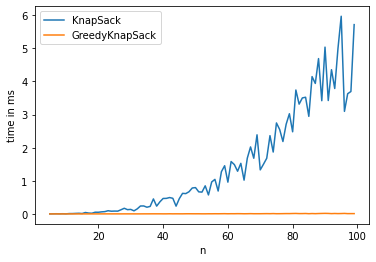

In [35]:
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat

x=[]; y=[]
z=[]; w=[]

for n in range(5,100):

  W, val, wt = knapsack_instance_generator(n)

  #la función repeat está ejecutando 10 veces knapSack y greedyKnapSack con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({val}, {wt}, {W}, {len(val)})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import greedyKnapSack", stmt=f"greedyKnapSack({val}, {wt}, {W}, {len(val)})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["KnapSack", "GreedyKnapSack"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Como se puede notar en el gráfico anterior, el tiempo de ejecución de la versión de programación dinámica da un resultado que concuerda con su complejidad, la cuál es $O(n * w)$, mientras que la complejidad de la versión "greedy" implementada, si bien es de $O(n^2)$, se ve como una línea recta paralela al eje x debido, probablemente, a los grandes tiempos de ejecución de la versión dinámica, lo que se puede deber a tamaños de mochila demasiado grandes que producen que el algoritmo tenga que trabajar con matrices muy grandes.

## 5.2 KnapSack v/s GreedyKnapSack (cantidad de iteraciones/sub-problemas realizados)

A continuación se muestra un gráfico en el que se comparan la cantidad de iteraciones/sub-problemas resueltos entre los algoritmos *KnapSack* y *GreedyKnapSack* para tamaños de problemas con n ∈ [5, 100].



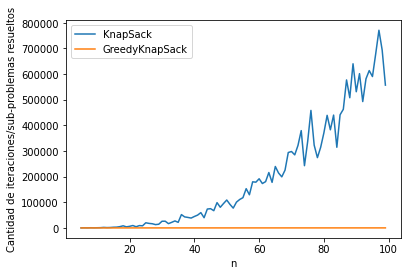

In [31]:
x=[n for n in range(5,100)] 
y=[]; 
z=[];

for n in range(5,100):
  W, val, wt = knapsack_instance_generator(n)

  subProblemas = 0
  knapSack(val, wt, W, len(val))

  iteraciones = 0
  greedyKnapSack(val, wt, W, len(val))

  y.append(subProblemas)
  z.append(iteraciones)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["KnapSack", "GreedyKnapSack"])

plt.xlabel('n')
plt.ylabel('Cantidad de iteraciones/sub-problemas resueltos')
plt.show()

### Análisis de resultados

Cómo se puede ver en el gráfico anterior, la cantidad de sub-problemas resueltos crece enormemente en el algoritmo *KnapSack* debido a las grandes matrices que se van generando a medida que aumenta el tamaño del problema, mientras que las iteraciones de *GreedyKnapSack* se mantienen bastante bajas debido que este algoritmo itera un máximo de $n$ veces cada vez que es llamado.

## 5.3 KnapSack v/s GreedyKnapSack (solución óptima alcanzada)

A continuación se muestra un gráfico en el que se comparan las soluciones obtenidas entre los algoritmos *KnapSack* y *GreedyKnapSack* para tamaños de problemas con n ∈ [1, 15].

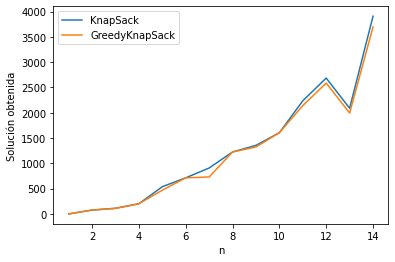

In [45]:
x=[n for n in range(1,15)] 
y=[]; 
z=[];

for n in range(1,15):
  W, val, wt = knapsack_instance_generator(n)

  subProblemas = 0
  a = knapSack(val, wt, W, len(val))

  iteraciones = 0
  b = greedyKnapSack(val, wt, W, len(val))

  y.append(a)
  z.append(b)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["KnapSack", "GreedyKnapSack"])

plt.xlabel('n')
plt.ylabel('Solución obtenida')
plt.show()

### Análisis de resultados

Como se puede notar, el gráfico anterior prueba la correctitud antes explicada de estos algoritmos, ya que se puede ver que la solución óptima (el mayor valor almacenado en la mochila) siempre es alcanzada por el algoritmo de programación dinámica, mientras que el algoritmo voraz se puede ver que iguala la solución del dinámico o encuentra una solución peor, pero nunca encuentra una solución mejor.